<a href="https://colab.research.google.com/github/Anj2307/fraud_detect/blob/main/logistic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd

In [62]:
from sklearn.linear_model import LogisticRegression

we have to import our datasets

In [7]:
train=pd.read_csv("/content/drive/MyDrive/final datesets/final datesets/train_dataset (1).csv")

In [8]:
y_train=train['fraud_bool']
x_train=train.drop('fraud_bool',axis=1)

Train our logistic regression

In [11]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

get to know coefficients and intercept

In [10]:
train.shape

(800000, 29)

In [12]:
coeff=model.coef_
coeff

array([[ 0.27723665, -0.30111804, -0.12085139,  0.05943535,  0.59212359,
         0.06707888, -0.13803508,  0.11808663,  0.10987116, -0.11138886,
        -0.26757082, -0.24015353,  0.2532961 ,  0.2802773 , -0.48767277,
        -0.45887463, -0.10925928,  0.14355754, -0.50260123,  0.20512611,
         0.07349243,  0.03929062,  0.04221044,  0.4522562 , -0.35869989,
         0.1783779 ,  0.10219452, -0.00306613]])

In [13]:
inter=model.intercept_
inter

array([-5.78782059])

Import the test data

In [15]:
test=pd.read_csv('/content/drive/MyDrive/test_dataset (2).csv')
test.shape

(200000, 29)

In [16]:
y_test=test['fraud_bool']
x_test=test.drop('fraud_bool',axis=1)

model prediction through test data

In [17]:
y_pred=model.predict(x_test)


time for checking precission of the model


In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[197781,     13],
       [  2185,     21]])

!!! Our model of logistic regreesion catch only 21 out of 2206 fraud cases
It suggests that model has very high accuracy but poor recall value for the fraud

So we have to apply SMOTE technique

In [19]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_resample,y_resample=smote.fit_resample(x_train,y_train)

Now we have to train the model after SMOTE

In [26]:
model_smote=LogisticRegression(class_weight='balanced',max_iter=100000000)
model_smote.fit(x_resample,y_resample)

LogisticRegression(class_weight='balanced', max_iter=100000000)

In [27]:
y_pred_smote=model.predict(x_test)

In [28]:
#print confusion matrix
confusion_matrix(y_test,y_pred_smote)

array([[197781,     13],
       [  2185,     21]])

In [32]:
from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(x_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)

print("ROC AUC Score:", auc)


ROC AUC Score: 0.8729506882491396


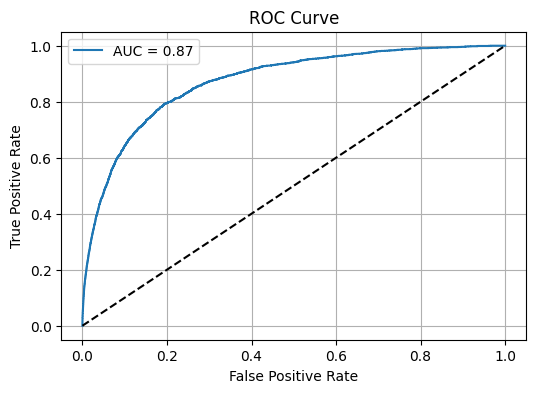

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


hence logistic regrssion is ineffective for this data because it predict wrong for fraud.